In [123]:
import itertools

import numpy as np

In [124]:
train_samples = []
train_labels = []

for i in range(50):
    train_samples.append(np.random.randint(13,64))
    train_labels.append(0)

    train_samples.append(np.random.randint(65,100))
    train_labels.append(1)


for i in range(1000):
    train_samples.append(np.random.randint(13,64))
    train_labels.append(1)

    train_samples.append(np.random.randint(65,100))
    train_labels.append(0)

In [125]:
len(train_samples)

2100

In [126]:
def shuffle(x,y):
    temp_x=[]
    temp_y=[]
    if len(x) == len(y):
        for i in range(len(x)):
            k = np.random.randint(0,len(x))
            temp_x.append(x[k])
            temp_y.append(y[k])
            x = np.delete(x, k)
            y = np.delete(y, k)

        return np.array(temp_x),np.array(temp_y)
    else:
        raise Exception("Arrays length didnt equal")

In [127]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

train_samples,train_labels = shuffle(train_samples,train_labels)

In [128]:
train_samples[0:5]

array([76, 90, 75, 93, 84])

In [129]:
train_labels[0:5]

array([0, 1, 0, 0, 0])

In [130]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

train_samples_scaled = scaler.fit_transform(train_samples.reshape(-1,1))
train_samples_scaled[0:5]

array([[0.73255814],
       [0.89534884],
       [0.72093023],
       [0.93023256],
       [0.8255814 ]])

In [131]:
import keras
from keras import Sequential
from keras.layers import Dense

In [132]:
import tensorflow as tf

devices  = tf.config.experimental.list_physical_devices()
print(devices)
print("Num Gpu Devices",len(devices))
tf.config.experimental.set_memory_growth(devices[1],True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num Gpu Devices 2


In [133]:
model = Sequential()
model.add(Dense(units=16,input_shape=(1,),activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=2,activation="softmax"))

In [134]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                32        
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [135]:
from keras.optimizer_v2.adam import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [136]:
model.fit(x=train_samples,y=train_labels,batch_size=10,epochs=30,validation_split=0.1,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 2s - loss: 0.6471 - accuracy: 0.4979 - val_loss: 0.6162 - val_accuracy: 0.5190 - 2s/epoch - 11ms/step
Epoch 2/30
189/189 - 1s - loss: 0.6308 - accuracy: 0.5101 - val_loss: 0.6020 - val_accuracy: 0.5333 - 851ms/epoch - 5ms/step
Epoch 3/30
189/189 - 1s - loss: 0.6195 - accuracy: 0.5614 - val_loss: 0.5902 - val_accuracy: 0.5476 - 698ms/epoch - 4ms/step
Epoch 4/30
189/189 - 1s - loss: 0.6062 - accuracy: 0.5989 - val_loss: 0.5760 - val_accuracy: 0.6381 - 605ms/epoch - 3ms/step
Epoch 5/30
189/189 - 1s - loss: 0.5923 - accuracy: 0.6344 - val_loss: 0.5630 - val_accuracy: 0.6667 - 766ms/epoch - 4ms/step
Epoch 6/30
189/189 - 1s - loss: 0.5798 - accuracy: 0.6688 - val_loss: 0.5511 - val_accuracy: 0.6667 - 660ms/epoch - 3ms/step
Epoch 7/30
189/189 - 1s - loss: 0.5697 - accuracy: 0.6820 - val_loss: 0.5396 - val_accuracy: 0.6857 - 537ms/epoch - 3ms/step
Epoch 8/30
189/189 - 1s - loss: 0.5571 - accuracy: 0.7090 - val_loss: 0.5297 - val_accuracy: 0.7238 - 546ms/epoch - 3ms/step
Ep

In [137]:
model.fit(x=train_samples_scaled,y=train_labels,batch_size=10,epochs=30,validation_split=0.1,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 1s - loss: 1.0723 - accuracy: 0.5021 - val_loss: 0.9870 - val_accuracy: 0.4810 - 889ms/epoch - 5ms/step
Epoch 2/30
189/189 - 1s - loss: 0.8789 - accuracy: 0.5021 - val_loss: 0.8354 - val_accuracy: 0.4810 - 667ms/epoch - 4ms/step
Epoch 3/30
189/189 - 1s - loss: 0.7709 - accuracy: 0.5021 - val_loss: 0.7469 - val_accuracy: 0.4810 - 627ms/epoch - 3ms/step
Epoch 4/30
189/189 - 1s - loss: 0.7104 - accuracy: 0.5021 - val_loss: 0.6979 - val_accuracy: 0.4810 - 738ms/epoch - 4ms/step
Epoch 5/30
189/189 - 1s - loss: 0.6774 - accuracy: 0.5021 - val_loss: 0.6685 - val_accuracy: 0.4810 - 801ms/epoch - 4ms/step
Epoch 6/30
189/189 - 1s - loss: 0.6580 - accuracy: 0.6630 - val_loss: 0.6501 - val_accuracy: 0.7905 - 648ms/epoch - 3ms/step
Epoch 7/30
189/189 - 1s - loss: 0.6439 - accuracy: 0.8894 - val_loss: 0.6351 - val_accuracy: 0.9476 - 566ms/epoch - 3ms/step
Epoch 8/30
189/189 - 1s - loss: 0.6317 - accuracy: 0.9196 - val_loss: 0.6219 - val_accuracy: 0.9333 - 774ms/epoch - 4ms/step


In [138]:
 ## Predict

In [139]:
test_samples = []
test_labels = []

for i in range(10):
    test_samples.append(np.random.randint(13, 64))
    test_labels.append(0)

    test_samples.append(np.random.randint(65, 100))
    test_labels.append(1)

for i in range(200):
    test_samples.append(np.random.randint(13, 64))
    test_labels.append(1)

    test_samples.append(np.random.randint(65, 100))
    test_labels.append(0)


def shuffle(x, y):
    temp_x = []
    temp_y = []
    if len(x) == len(y):
        for i in range(len(x)):
            k = np.random.randint(0, len(x))
            temp_x.append(x[k])
            temp_y.append(y[k])
            x = np.delete(x, k)
            y = np.delete(y, k)

        return np.array(temp_x), np.array(temp_y)
    else:
        raise Exception("Arrays length didnt equal")


test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

test_samples, test_labels = shuffle(test_samples, test_labels)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

test_samples_scaled = scaler.fit_transform(test_samples.reshape(-1, 1))
test_samples_scaled[0:5]

array([[0.17647059],
       [0.85882353],
       [0.90588235],
       [0.83529412],
       [0.44705882]])

In [140]:
predictions = model.predict(test_samples_scaled,batch_size=10,verbose=0)
predictions

array([[0.1610312 , 0.83896875],
       [0.8084132 , 0.19158676],
       [0.8402871 , 0.15971294],
       [0.790744  , 0.20925593],
       [0.37970367, 0.62029636],
       [0.13128336, 0.86871666],
       [0.14193182, 0.8580682 ],
       [0.13974598, 0.86025405],
       [0.8084132 , 0.19158676],
       [0.16631262, 0.8336874 ],
       [0.85041374, 0.14958623],
       [0.30539104, 0.694609  ],
       [0.12923685, 0.8707631 ],
       [0.20208101, 0.7979189 ],
       [0.8562626 , 0.14373733],
       [0.15096156, 0.8490385 ],
       [0.3415755 , 0.6584245 ],
       [0.14414608, 0.855854  ],
       [0.29381767, 0.70618236],
       [0.16900486, 0.8309951 ],
       [0.31721556, 0.68278444],
       [0.730757  , 0.269243  ],
       [0.790744  , 0.20925593],
       [0.685213  , 0.314787  ],
       [0.5966981 , 0.4033019 ],
       [0.7197675 , 0.28023252],
       [0.7620482 , 0.23795184],
       [0.25019976, 0.74980026],
       [0.4738493 , 0.5261507 ],
       [0.4876175 , 0.5123825 ],
       [0.

In [141]:
predict_labels = np.argmax(predictions,axis=1)
predict_labels

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [142]:
true_labels = np.where(test_labels==predict_labels)
print(len(true_labels[0]))
print("True ",(len(true_labels[0])/len(test_samples)))

393
True  0.9357142857142857


In [143]:
## Confusion matrix

In [144]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [145]:
cm = confusion_matrix(test_labels,predict_labels)

In [146]:
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):

    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]

    print(cm)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

[[201   9]
 [ 18 192]]


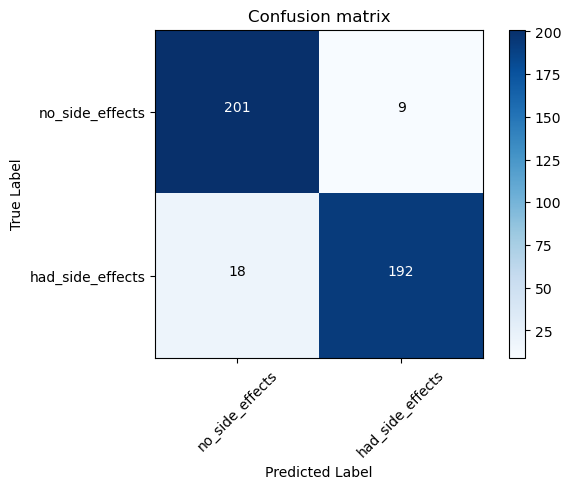

In [147]:
cm_plot_labels = ["no_side_effects","had_side_effects"]
plot_confusion_matrix(cm,cm_plot_labels)

In [148]:
## Save and Load Model

In [149]:
import os

if os.path.isfile("model/modelh5") is False:
    model.save("model/model.h5")


In [150]:
del model

In [151]:
model = keras.models.load_model("model/model.h5")

In [152]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                32        
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [153]:
model.get_weights()

[array([[ 0.37331295, -0.15879202,  0.01934355,  0.6145294 ,  0.12687854,
          0.14645283,  0.34207812, -0.06043488,  0.43345794, -0.49835417,
         -0.07445937, -0.36750567, -0.03565758,  0.37043333, -0.2211672 ,
          0.66086894]], dtype=float32),
 array([ 0.14497451,  0.        ,  0.56152636,  0.12579276, -0.31573045,
        -0.33120483,  0.5345258 ,  0.        ,  0.22187535,  0.        ,
         0.        ,  0.        ,  0.        , -0.37059525,  0.        ,
        -0.14022514], dtype=float32),
 array([[-0.3063031 , -0.20565782,  0.29786864, -0.26940846,  0.06242035,
         -0.2831732 ,  0.02387413,  0.1561698 , -0.24064174, -0.14292699,
          0.13946593,  0.16129307,  0.0153222 ,  0.32715034, -0.24267364,
          0.5225454 , -0.13534053, -0.04381257,  0.03356855,  0.12957019,
          0.06129357,  0.08352365, -0.04715679,  0.2834957 ,  0.1370652 ,
         -0.33370224,  0.15823536, -0.05544524, -0.31529382,  0.34224838,
         -0.12868902, -0.16400358],
 